#  Connect duckdb in python


In [41]:
import duckdb

with duckdb.connect("databases/hotels.duckdb") as conn:
    conn.sql("DROP TABLE IF EXISTS bookings;")
    conn.sql(
        """
        CREATE TABLE IF NOT EXISTS bookings (
            date DATE, 
            room_type STRING,
            price FLOAT,
            breakfast BOOLEAN,
            name STRING,
            email STRING,
            guests UINT8
        )
    """
    )

    conn.sql("""
    INSERT INTO bookings VALUES
        ('2024-01-15', 'Single', 150.00, True, 'John Doe', 'john@email.com', 2),
        ('2024-01-16', 'Double', 220.00, False, 'Jane Smith', 'jane@email.com', 3),
        ('2024-01-17', 'Suite', 450.00, True, 'Bob Johnson', 'bob@email.com', 1),
        ('2024-01-18', 'Single', 150.00, True, 'Alice Brown', 'alice@email.com', 1),
        ('2024-01-19', 'Double', 220.00, True, 'Charlie Davis', 'charlie@email.com', 4),
        ('2024-01-20', 'Suite', 450.00, False, 'Eva Wilson', 'eva@email.com', 2),
        ('2024-01-21', 'Single', 150.00, False, 'Frank Miller', 'frank@email.com', 1),
        ('2024-01-22', 'Double', 220.00, True, 'Grace Lee', 'grace@email.com', 3);
    """)

    bookings = conn.sql("FROM bookings;").df()

    bookings

    print(conn.sql('FROM bookings;'))  

    print("hej")



┌────────────┬───────────┬───────┬───────────┬───────────────┬───────────────────┬────────┐
│    date    │ room_type │ price │ breakfast │     name      │       email       │ guests │
│    date    │  varchar  │ float │  boolean  │    varchar    │      varchar      │ uint8  │
├────────────┼───────────┼───────┼───────────┼───────────────┼───────────────────┼────────┤
│ 2024-01-15 │ Single    │ 150.0 │ true      │ John Doe      │ john@email.com    │      2 │
│ 2024-01-16 │ Double    │ 220.0 │ false     │ Jane Smith    │ jane@email.com    │      3 │
│ 2024-01-17 │ Suite     │ 450.0 │ true      │ Bob Johnson   │ bob@email.com     │      1 │
│ 2024-01-18 │ Single    │ 150.0 │ true      │ Alice Brown   │ alice@email.com   │      1 │
│ 2024-01-19 │ Double    │ 220.0 │ true      │ Charlie Davis │ charlie@email.com │      4 │
│ 2024-01-20 │ Suite     │ 450.0 │ false     │ Eva Wilson    │ eva@email.com     │      2 │
│ 2024-01-21 │ Single    │ 150.0 │ false     │ Frank Miller  │ frank@email.com  

In [10]:
import duckdb

with duckdb.connect("databases/jokes.duckdb") as conn:
    conn.sql("DROP TABLE IF EXISTS jokes;")

    conn.sql("""--sql
        CREATE TABLE IF NOT EXISTS jokes (
            id INT,
            joke STRING
        );
    """)

    conn.sql("""--sql
        INSERT INTO jokes VALUES
        (1, 'why do prgrammers hate'),
        (2, 'why do java need glasses');        
    """)

    desc = conn.sql("DESC;").df()

In [11]:
desc

,database,schema,name,column_names,column_types,temporary
0,jokes,main,jokes,"[id, joke]","[INTEGER, VARCHAR]",False


In [12]:
with duckdb.connect("databases/jokes.duckdb") as conn:
    jokes = conn.sql("FROM jokes;").df()

jokes

,id,joke
0,1,why do prgrammers hate
1,2,why do java need glasses


In [13]:
jokes["joke"]

0      why do prgrammers hate
1    why do java need glasses
Name: joke, dtype: object

## Ingest a csv file into duckdb

-we can open a csv without a database connnection

In [17]:
# same as pd.read_csv()
finance = duckdb.sql("FROM 'data/financial_data.csv'").df()
finance.head(3)

,transaction_id,date,company,transaction_type,category,amount,currency,account_number,description,status,payment_method,tax_amount,net_amount
0,TXN1000,2024-01-15,UnitedHealth Group,Investment,Marketing,498789.60,JPY,ACC90616,Q1 revenue for r&d,Completed,Check,15640.11,483149.49
1,TXN1001,2024-12-22,Broadcom Inc,Expense,Administrative,407890.44,GBP,ACC72475,Q4 capital gain for it,Completed,Wire Transfer,25883.85,382006.59
2,TXN1002,2024-10-11,Starbucks,Capital Gain,Operations,363927.61,USD,ACC26222,Q3 expense for administrative,Pending,ACH,24814.56,339113.05


In [18]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    50 non-null     object        
 1   date              50 non-null     datetime64[us]
 2   company           50 non-null     object        
 3   transaction_type  50 non-null     object        
 4   category          50 non-null     object        
 5   amount            50 non-null     float64       
 6   currency          50 non-null     object        
 7   account_number    50 non-null     object        
 8   description       50 non-null     object        
 9   status            50 non-null     object        
 10  payment_method    50 non-null     object        
 11  tax_amount        50 non-null     float64       
 12  net_amount        50 non-null     float64       
dtypes: datetime64[us](1), float64(3), object(9)
memory usage: 5.2+ KB


In [19]:
finance["category"].value_counts()

category
Operations        8
Legal             6
Sales             5
Administrative    5
HR                5
Distribution      5
IT                5
Marketing         4
R&D               4
Manufacturing     3
Name: count, dtype: int64

SQL query directly on a dataframe

In [24]:
df_category_amount = duckdb.sql(""" --sql
SELECT
    category,
    SUM(amount) AS total_amount
FROM finance
GROUP BY category
ORDER BY total_amount DESC

""").df()

df_category_amount

,category,total_amount
0,Operations,2516205.96
1,Administrative,1524607.15
2,Marketing,1434237.33
3,IT,1272719.86
4,Distribution,1266188.51
5,R&D,1223866.29
6,Manufacturing,1140503.86
7,Sales,1086062.70
8,Legal,923504.37
9,HR,301675.46


<Axes: title={'center': 'Total amount per category'}, xlabel='category', ylabel='total amount'>

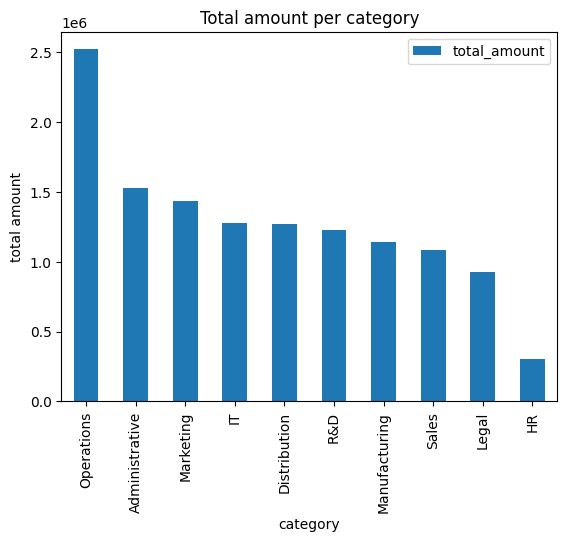

In [ ]:
df_category_amount.plot(
    x="category",
    y="total_amount",
    kind="bar",
    title="Total amount per category",
    xlabel="category",
    ylabel="total amount",
)

## Read several csv files

only read the hotel_bookings and nothing else

In [29]:
duckdb.sql("FROM'data/hotel_bookings*.csv'").df()

,booking_id,guest_name,check_in,check_out,room_type,guests,price_sek_per_night,breakfast,source,status
0,H2025-01-001,Anna Berg,2025-01-05,2025-01-07,Standard,2,1150,True,Direct,Confirmed
1,H2025-01-002,Johan Nilsson,2025-01-10,2025-01-11,Single,1,890,False,Booking.com,Confirmed
2,H2025-01-003,Sofia Lind,2025-01-14,2025-01-16,Deluxe,2,1450,True,Expedia,Confirmed
3,H2025-01-004,Erik Svensson,2025-01-20,2025-01-22,Standard,3,1250,True,Direct,Confirmed
4,H2025-01-005,Maria Johansson,2025-01-27,2025-01-28,Single,1,920,False,Hotels.com,Cancelled
5,H2025-02-006,Daniel Karlsson,2025-02-02,2025-02-04,Standard,2,1190,True,Direct,Confirmed
6,H2025-02-007,Elin Andersson,2025-02-07,2025-02-09,Deluxe,2,1520,True,Booking.com,Confirmed
7,H2025-02-008,Lukas Eriksson,2025-02-12,2025-02-13,Single,1,940,False,Expedia,Confirmed
8,H2025-02-009,Olivia Larsson,2025-02-18,2025-02-20,Standard,2,1210,True,Direct,Confirmed
9,H2025-02-010,Viktor Persson,2025-02-24,2025-02-26,Deluxe,3,1580,True,Hotels.com,Confirmed


In [5]:
bookings.head()

,date,room_type,price,breakfast,name,email,guests
0,2024-01-15,Single,150.0,True,John Doe,john@email.com,2
1,2024-01-16,Double,220.0,False,Jane Smith,jane@email.com,3
2,2024-01-17,Suite,450.0,True,Bob Johnson,bob@email.com,1
3,2024-01-18,Single,150.0,True,Alice Brown,alice@email.com,1
4,2024-01-19,Double,220.0,True,Charlie Davis,charlie@email.com,4


In [6]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       8 non-null      datetime64[us]
 1   room_type  8 non-null      object        
 2   price      8 non-null      float32       
 3   breakfast  8 non-null      bool          
 4   name       8 non-null      object        
 5   email      8 non-null      object        
 6   guests     8 non-null      uint8         
dtypes: bool(1), datetime64[us](1), float32(1), object(3), uint8(1)
memory usage: 436.0+ bytes


# Read csv file directly

In [10]:

invoice = duckdb.sql("""
    SELECT *
    FROM 'data/Leverantorsfaktura202408.csv';
""").df()

print(f"{invoice.shape = }")
invoice.head()

invoice.shape = (92989, 7)


,Förvaltning,Leverantör,Organisationsnummer,Verifikationsnummer,Konto,Kontotext,Belopp exkl moms
0,Stadsmiljönämnden,TRACK TEC GMBH,106/5727/0626,4001291513,4101,Inköp anläggnings och underhållsmaterial,"9 835 315,00"
1,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378982,6185,Anläggningsentreprenad,"870,00"
2,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601377374,6185,Anläggningsentreprenad,"870,00"
3,Kretslopp och Vatten,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,5601378519,6185,Anläggningsentreprenad,"870,00"
4,Exploateringsnämnden,POLISMYNDIGHETEN I VÄSTRA GÖTALAND,2021000076,2001226894,7641,Diverse skatter och offentliga avgifter,"1 000,00"


In [11]:
invoice.shape

(92989, 7)

In [13]:

finance = duckdb.sql("""
    SELECT *
    FROM 'data/financial_data.csv';
""").df()

finance.head()

,transaction_id,date,company,transaction_type,category,amount,currency,account_number,description,status,payment_method,tax_amount,net_amount
0,TXN1000,2024-01-15,UnitedHealth Group,Investment,Marketing,498789.60,JPY,ACC90616,Q1 revenue for r&d,Completed,Check,15640.11,483149.49
1,TXN1001,2024-12-22,Broadcom Inc,Expense,Administrative,407890.44,GBP,ACC72475,Q4 capital gain for it,Completed,Wire Transfer,25883.85,382006.59
2,TXN1002,2024-10-11,Starbucks,Capital Gain,Operations,363927.61,USD,ACC26222,Q3 expense for administrative,Pending,ACH,24814.56,339113.05
3,TXN1003,2024-09-30,Lockheed Martin,Dividend,R&D,336378.01,EUR,ACC86805,Q4 investment for marketing,Completed,Check,46359.17,290018.84
4,TXN1004,2024-07-02,IBM Corp,Operating Cost,Administrative,193284.51,GBP,ACC72617,Q2 expense for distribution,Completed,Credit Card,41529.35,151755.16


## Read several csv files from a folder

In [15]:

bookings = duckdb.sql("""
    SELECT * FROM 'data/hotel*.csv'
""").df()


bookings.head()

,booking_id,guest_name,check_in,check_out,room_type,guests,price_sek_per_night,breakfast,source,status
0,H2025-01-001,Anna Berg,2025-01-05,2025-01-07,Standard,2,1150,True,Direct,Confirmed
1,H2025-01-002,Johan Nilsson,2025-01-10,2025-01-11,Single,1,890,False,Booking.com,Confirmed
2,H2025-01-003,Sofia Lind,2025-01-14,2025-01-16,Deluxe,2,1450,True,Expedia,Confirmed
3,H2025-01-004,Erik Svensson,2025-01-20,2025-01-22,Standard,3,1250,True,Direct,Confirmed
4,H2025-01-005,Maria Johansson,2025-01-27,2025-01-28,Single,1,920,False,Hotels.com,Cancelled


In [16]:
bookings.tail()

,booking_id,guest_name,check_in,check_out,room_type,guests,price_sek_per_night,breakfast,source,status
10,H2025-03-011,Maria Berg,2025-03-21,2025-03-22,Standard,3,1250,True,Hotels.com,Confirmed
11,H2025-03-012,Isak Axelsson,2025-03-15,2025-03-18,Single,1,1012,True,Direct,Confirmed
12,H2025-03-013,Elin Håkansson,2025-03-12,2025-03-13,Standard,2,1151,True,Direct,Cancelled
13,H2025-03-014,Elias Bengtsson,2025-03-08,2025-03-09,Single,2,1097,True,Hotels.com,Confirmed
14,H2025-03-015,Albin Lundberg,2025-03-01,2025-03-03,Single,1,1027,False,Expedia,Confirmed


Read json data

In [25]:


duckdb.sql("""
    SELECT *
    FROM 'data/library.json'
""").df()

,name,books
0,Coolu Libraru,"[{'id': 1, 'title': 'The Hitchhiker's Guide to..."


unnesting

In [28]:

duckdb.sql("""
    SELECT 
        l.name as library_name,
        UNNEST(l.books, max_depth := 2)
    FROM 'data/library.json' AS l 
""").df()


,library_name,id,title,author,year
0,Coolu Libraru,1,The Hitchhiker's Guide to the Galaxy,Douglas Adams,1979
1,Coolu Libraru,2,Pride and Prejudice,Jane Austen,1813
2,Coolu Libraru,3,1984,George Orwell,1949
3,Coolu Libraru,4,To Kill a Mockingbird,Harper Lee,1960
4,Coolu Libraru,5,The Great Gatsby,F. Scott Fitzgerald,1925
5,Coolu Libraru,6,Moby Dick,Herman Melville,1851
6,Coolu Libraru,7,War and Peace,Leo Tolstoy,1869
7,Coolu Libraru,8,The Lord of the Rings,J.R.R. Tolkien,1954
8,Coolu Libraru,9,Crime and Punishment,Fyodor Dostoevsky,1866
9,Coolu Libraru,10,Don Quixote,Miguel de Cervantes,1605


use cross join

In [37]:

books.to_csv("data/bookds.csv)"

)

In [29]:

duckdb.sql("""
    SELECT 
           l.name, 
           b
    FROM 'data/library.json' l
    CROSS JOIN UNNEST(l.books) b
""").df()



,name,b
0,Coolu Libraru,"{'unnest': {'id': 10, 'title': 'Don Quixote', ..."
1,Coolu Libraru,"{'unnest': {'id': 9, 'title': 'Crime and Punis..."
2,Coolu Libraru,"{'unnest': {'id': 8, 'title': 'The Lord of the..."
3,Coolu Libraru,"{'unnest': {'id': 7, 'title': 'War and Peace',..."
4,Coolu Libraru,"{'unnest': {'id': 6, 'title': 'Moby Dick', 'au..."
5,Coolu Libraru,"{'unnest': {'id': 5, 'title': 'The Great Gatsb..."
6,Coolu Libraru,"{'unnest': {'id': 4, 'title': 'To Kill a Mocki..."
7,Coolu Libraru,"{'unnest': {'id': 3, 'title': '1984', 'author'..."
8,Coolu Libraru,"{'unnest': {'id': 2, 'title': 'Pride and Preju..."
9,Coolu Libraru,"{'unnest': {'id': 1, 'title': 'The Hitchhiker'..."


In [33]:

books = duckdb.sql("""
    SELECT 
           l.name, 
           b.unnest.title,
           b.unnest.author,
           b.unnest.year,
    FROM 'data/library.json' l
    CROSS JOIN UNNEST(l.books) b
""").df()

books

,name,title,author,year
0,Coolu Libraru,Don Quixote,Miguel de Cervantes,1605
1,Coolu Libraru,Crime and Punishment,Fyodor Dostoevsky,1866
2,Coolu Libraru,The Lord of the Rings,J.R.R. Tolkien,1954
3,Coolu Libraru,War and Peace,Leo Tolstoy,1869
4,Coolu Libraru,Moby Dick,Herman Melville,1851
5,Coolu Libraru,The Great Gatsby,F. Scott Fitzgerald,1925
6,Coolu Libraru,To Kill a Mockingbird,Harper Lee,1960
7,Coolu Libraru,1984,George Orwell,1949
8,Coolu Libraru,Pride and Prejudice,Jane Austen,1813
9,Coolu Libraru,The Hitchhiker's Guide to the Galaxy,Douglas Adams,1979


In [34]:
books.to_csv("data/books.", index =False)